# New Keynesian Model with Backward Looking Expectations
### Model-Project - by fbm569 and pbn351

The standard New Keynesian Model consists of a three equations framework. The dynamic IS-curve, the New Keynesian Philipscurve and the monetary policy rule also called the Taylor Rule. What characterizes these equations are that they are build on forward-looking expectations. Agents in the model make decisions taking into account the future evolution of economic variables. The approach is known as rational expecations, where each agent forms expecations using the conditional expectation opperator and thus forming model consistent expectations. The approach of this project is to study the same New Keynesian model, but with backward-looking expectations. This approach makes the computational aspects of solving and simulating the model more tractable.

The standard New Keynesian model for instance found in Woodford (2004) and Gali (2008) has the following three equations:

1. Dynamic IS-curve:
$$y_t=\mathbb{E}_t\{y_{t+1}\}-\frac{1}{\sigma}(i_t-\mathbb{E}_t\{\pi_{t+1}\}-\rho)$$ 

2. NKPC:
$$\pi_t=\mathbb{E}_t\{\pi_{t+1}\}+\kappa(y_t-y_t^n)$$

3. Taylor Rule:
$$i_t=\rho+\pi_t+\phi_\pi(\pi_t-\pi_t^*)+\phi_y(y_t-y_t^n)$$

All the model equations are forward looking. Thus in order to solve these, one would have to solve for a rational expecations equilibrium. 

Instead this project studies almost the same model, but with backward-looking expectations. That is:

$$\mathbb{E}_{t-1}\pi_t=\pi_{t-1}$$


### Model Equations
The model equations used in this project is:

1. Dynamic IS-curve
$$y_t=y_t^n-\frac{1}{\sigma}(r_t-\rho)+z_t$$

2. Backward-looking Philipscurve
$$\pi_t=\mathbb{E}_{t-1}\{\pi_{t}\}+\kappa(y_t-y_t^n)+\nu_t$$

3. Taylor Rule
$$i_t=\rho+\pi_t+\phi_\pi(\pi_t-\pi_t^*)+\phi_y(y_t-y_t^n)$$

4. Fisher identity

$$r_t=i_t-\mathbb{E}_t\{\pi_{t+1}\}$$

5. Expectations formation
$$\mathbb{E}_{t-1}\pi_t=\pi_{t-1}$$

6. Stochastic processes (Demand and Supply shock)
$$z_t=\rho_z z_{t-1}+\varepsilon_z$$ 

$$a_t=\rho_\nu \nu_{t-1}+\varepsilon_a$$

$$\varepsilon_z\sim \mathbb{N}(0,\sigma_z)$$

$$\varepsilon_\nu\sim \mathbb{N}(0,\sigma_\nu)$$

The shocks in the model are governed by a demand shock $z_t$ and a supply shock $a_t$ both driven by an AR(1)-proces. 

The expecations formations is such that agents form their current expectation by setting it equal to last periods value - this is known as adaptive expectations. 

The model has five endogenous variables:
Output $y_t$, inflation $\pi_t$, Nominal Interest rate $i_t$, Real interest rate $r_t$ and the expectation to next periods inflation $\mathbb{E}_t\{\pi_{t-1}\}$.  

The parameters in model are the slope of IS-curve $\sigma$, slope of Philipscurve $\kappa$ and the two Taylor parameters $phi_y$ and $\phi_\pi$. 







### 1. The Model Equilibrium

We start by importing packages that we use

In [8]:
from scipy.optimize import fsolve
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import ipywidgets as widgets
from matplotlib.pyplot import *
from IPython.display import display, clear_output
import copy

We then define the Phililpscurve:

In [9]:
#Define Philipscurve as function:
def Philipscurve(y):
    return pi_lag+kappa*(y-ynat)


We want to plot the Philipscurve in a (y,$\pi$) diagram showing its slope. But in order to do the plotting, we need to define and give values to some of the parameters. 

In [10]:
#Set parameter values for now. 
#Notice that last periods inflation is assumed to be 0. 
pi_lag=0
kappa=0.5
ynat=2

Now we plot the Philipscurve

In [11]:
x = np.linspace(0,10,100)
y=Philipscurve(x)
plt.plot(x,y, "b",label="Philipscurve")
plt.legend(title="Philipscurve")
plt.suptitle('Philipscurve')
plt.xlabel('Output (y)')
plt.ylabel('Inflation $(\pi)$')


plt.axvline(x=2, label='Natural Output',color='k')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

The Philipscurve is upward sloping implying that an increase in output, increases inflation. Notice that when output is at its natural $y^n=2$ then inflation is zero (price-stability). 

We now want to use the IS-equation and the monetary policy rule to form what is known as the Aggregate Demand curve (AD-curve for short). 

If we insert the monetary policy rule into the IS-curve and solve for Y we obtain the Aggregate demand curve:

$$y_t=y^n-\frac{\frac{1}{\sigma}\phi_\pi}{(1+\frac{1}{\sigma}\phi_y)}(\pi_t-\pi_t^*)+\frac{1}{(1+\frac{1}{\sigma}\phi_y)}z_t$$

The curve is downward sloping implying that an increase in inflation makes the central bank raise interest rates and thus lowering output.  

We now want to both plot the Philipscurve and the Aggregate Demand curve - combined we call it the AS-AD model. Notice that when we define the AD-curve, it is the inverse of the above function since it should be a function of y in the diagram.

In [12]:
#Define AD-curve as a function:
def ADcurve(y):
    return (y-(1/(1+sigma*phi_y))-ynat)/(-(sigma*phi_pi/(1+sigma*phi_y)))+pistar

#Choose parametervalues for now. 
pistar=0
sigma=1
phi_y=0.5
phi_pi=1.5

Now we are ready to plot both the Philipscurve and the Aggregate Demand curve in the same diagram showing an equilibrium. 

In [13]:
#Calculate values of both a plot both curves in the same diagram
z = np.linspace(0,10,100)
w=ADcurve(z)
plt.plot(z,w,"r",label='AD-curve')
plt.plot(x,y,"b",label='Philipscurve')
plt.legend()
plt.suptitle('AS-AD')
plt.xlabel('Output (y)')
plt.ylabel('Inflation $(\pi)$')

#Insert vertial line at natural output
plt.axvline(x=2, label='Natural Output',color='k')

plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

The plot shows where the two curves cross each other. The short run equilibrium in the model is determined by the crossing point. In addition, the long run aggregate supply curve has been drawn. 

The steady state of the economy is the long run equilibrium at which the economy fluctuates around. Each time it is hit by a shock, the economy moves out of the steady-state and then return after a number of periods. The steady-state equations is found by setting each shock to zero $\epsilon_z=\epsilon_v=0$ and when the inflation is stabalised $\pi_t=pi_{t-1}$. The equations are:

$$y_t=y^n$$
$$r_t=\rho$$
$$\pi_t=\pi^*$$
$$\mathbb{E}_t\{\pi_{t+1}\}=\pi_t$$
$$i_t=\rho+\pi_t^*$$




### 2. Impulse Response Functions
We now turn to simulation of the model. We let both shock follow the aforementioned AR(1)-processes. We set the persistence of both shocks to be relatively high $\rho_a=0.9$ and $\rho_z=0.9$. 

We start by defining each equation in the model. We define $\frac{1}{\sigma}=\alpha$. 

In [14]:
#Philipscurve
def yt_func(pit, zt, *params):
    return ytbar - (alpha*phipi/(1+alpha*phiy))*(pit-pitstar)+(1/(1+alpha*phiy))*zt

#AD-curve
def pit_func(pit_1, yt, vt, *params):
    return pit_1+kappa*(yt-ytbar)+vt

#Stochastic processes
def z_func(zt_1, epsilonz, *params):
    return rhoz*zt_1+epsilonz

def v_func(vt_1, epsilonv, *params):
    return rhov*vt_1+epsilonv

We now set some default parameter values to begin with.
The parameter $\alpha=1$, $\phi_y=0.5$, $\phi_\pi=1.5$, $\kappa=0.5$. The variances of the shocks are set to $\sigma_z^2=1$, $\sigma_\nu^2=0$. This muting the supply shock  

In [16]:
##Set default value to all parameters
ytbar_default = 0
alpha_default = 1
phipi_default = 1.5 
phiy_default = 0.5
pitstar_default = 0
kappa_default = 0.5
rhoz_default = 0.9
rhov_default = 0.9
epsilonz_scale_default = 1
epsilonv_scale_default = 0.05
T_default = 20
crisis_default = 'Yes'

We now want to see what happens to each endogenous variables when hit by a unexpected shock in the first period. We only consider demand shocks and the persistence is set as above. We plot the impulse response functions that shows deviation from the steady state value when the shock hits. The plot lets us analyze how the shock propagates in the economy 

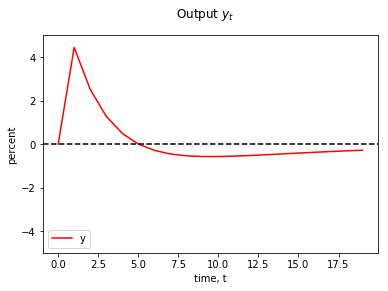

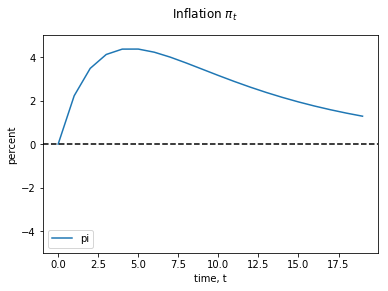

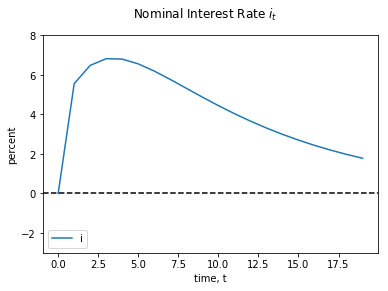

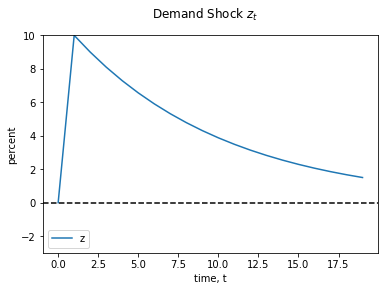

In [17]:
#Set all values to their default defined value
%matplotlib inline
ytbar = ytbar_default
alpha = alpha_default
phipi = phipi_default
phiy = phiy_default
pitstar = pitstar_default
kappa = kappa_default
rhoz = rhoz_default
rhov = rhov_default
epsilonz_scale = epsilonz_scale_default
epsilonv_scale = epsilonv_scale_default
T = T_default
isCrisis = crisis_default

plt.close()

#Allocate space for the endogenous variables by setting them to zero in all periods in the beginning
epsilonz = np.zeros(T)
epsilonz[1]= 10
epsilonv = np.random.normal(loc=0,scale=0,size=T)
z = np.zeros(T)
v = np.zeros(T)
y = np.zeros(T)
pi = np.zeros(T)
i=np.zeros(T)

#Solve for each time period by solving the system of difference equation consisting of the AD and Philipscurve. 
for t in range(1,T):
    def equations(p):
        yt, pit = p
        return (ytbar - (alpha*phipi/(1+alpha*phiy))*(pit-pitstar)+(1/(1+alpha*phiy))*z[t]-yt, pi[t-1]+kappa*(yt-ytbar)+v[t]-pit)

#In each period save the value to variable
    z[t] = z_func(z[t-1], epsilonz[t])
    v[t] = v_func(v[t-1], epsilonv[t])
    #print(z[t],v[t])

    y[t], pi[t] =  fsolve(copy.deepcopy(equations),(0, 0))
    
    i[t]=phi_pi*(pi[t]-pitstar)+phi_y*(y[t]-ytbar)
    #print(pi[t])

    #Plot the impulse response functions
fig = plt.figure()
ax = fig.add_subplot(1,1,1)


ax.plot(y,'-r',label = 'y')
#ax.plot(pi, label = 'pi')

ax.set_xlabel('time, t')

ax.set_ylabel('percent')
ax.set_ylim([-5,5])
ax.legend(loc='lower left')
plt.suptitle('Output $y_t$')
axhline(y=0,color="k",linestyle="--")

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#ax.plot(y,'-rD',label = 'y',markevery=mark)
ax.plot(pi, label = 'pi')

ax.set_xlabel('time, t')

ax.set_ylabel('percent')
ax.set_ylim([-5,5])
ax.legend(loc='lower left')
plt.suptitle('Inflation $\pi_t$')
axhline(y=0,color="k",linestyle="--")

fig = plt.figure()
ax = fig.add_subplot(1,1,1)


#ax.plot(y,'-rD',label = 'y',markevery=mark)
ax.plot(i, label = 'i')

ax.set_xlabel('time, t')

ax.set_ylabel('percent')
ax.set_ylim([-3,8])
ax.legend(loc='lower left')
plt.suptitle('Nominal Interest Rate $i_t$')
axhline(y=0,color="k",linestyle="--")

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#ax.plot(y,'-rD',label = 'y',markevery=mark)
ax.plot(z, label = 'z')

ax.set_xlabel('time, t')

ax.set_ylabel('percent')
ax.set_ylim([-3,10])
ax.legend(loc='lower left')
plt.suptitle('Demand Shock $z_t$')
axhline(y=0,color="k",linestyle="--")

### 3. Interactive Simulation of the Model

The impulse response functions above showed how the demand shock propagate in the economy by holding the other shock constant and using a one-period shock. Now we want to see how the whole economy moves when hit by shock in each period. We consider both demand and supply shocks when doing the simulation. In order to make the simulation as nice as possible we create an interactive user surface that lets the user change each parameter and see the simulation again.  

First we need to set up a slider where it is possible to change the parameter values. We set the initial value of the slider to the default value defined above

In [14]:
#Define each slider, its maximum, minimum etc. 
#ToDo: Rename variables appropriately
ytbar_slider = widgets.BoundedFloatText(
    value=ytbar_default,
    min=-5,
    max=5.0,
    step=0.1,
    description='$y_t^n:$',
    disabled=False
)

alpha_slider = widgets.BoundedFloatText(
    value=alpha_default,
    min=0,
    max=2.0,
    step=0.1,
    description='$\alpha:$',
    disabled=False
)

thetapi_slider = widgets.BoundedFloatText(
    value=phipi_default,
    min=1,
    max=5.0,
    step=0.1,
    description='$\phi_\pi$:',
    disabled=False
)

thetay_slider = widgets.BoundedFloatText(
    value=phiy_default,
    min=0,
    max=3.0,
    step=0.1,
    description='$\phi_y$:',
    disabled=False
)

pitstar_slider = widgets.BoundedFloatText(
    value=pitstar_default,
    min=-5,
    max=5,
    step=0.1,
    description='$\pi_t^*$:',
    disabled=False
)

phi_slider = widgets.BoundedFloatText(
    value=kappa_default,
    min=0,
    max=2,
    step=0.1,
    description='$\kappa$:',
    disabled=False
)

rhoz_slider = widgets.BoundedFloatText(
    value=rhoz_default,
    min=0,
    max=0.99,
    step=0.01,
    description='$p_z:$',
    disabled=False
)

rhov_slider = widgets.BoundedFloatText(
    value=rhov_default,
    min=0,
    max=0.99,
    step=0.01,
    description='$p_v:$',
    disabled=False
)

epsilonz_scale_slider = widgets.BoundedFloatText(
    value=epsilonz_scale_default,
    min=0,
    max=5,
    step=0.1,
    description='$\sigma_z^2$:',
    disabled=False
)

epsilonv_scale_slider = widgets.BoundedFloatText(
    value=epsilonv_scale_default,
    min=0,
    max=1,
    step=0.1,
    description='$\sigma_\nu^2:$',
    disabled=False
)

T_slider = widgets.BoundedIntText(
    value=100,
    min=10,
    max=1000,
    step=10,
    description='T:',
    disabled=False
)

crisis_slider = widgets.SelectionSlider(
    options=['Yes', 'No'],
    value=crisis_default,
    description='Crisis?',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

#Make a display where you can change the parameter values
display(ytbar_slider)
display(alpha_slider)
display(thetapi_slider)
display(thetay_slider)
display(pitstar_slider)
display(phi_slider)
display(rhoz_slider)
display(rhov_slider)
display(epsilonz_scale_slider)
display(epsilonv_scale_slider)
display(T_slider)
display(crisis_slider)

time.sleep(2)

BoundedFloatText(value=0.0, description='$y_t^n:$', max=5.0, min=-5.0, step=0.1)

BoundedFloatText(value=1.0, description='$\x07lpha:$', max=2.0, step=0.1)

BoundedFloatText(value=1.5, description='$\\phi_\\pi$:', max=5.0, min=1.0, step=0.1)

BoundedFloatText(value=0.5, description='$\\phi_y$:', max=3.0, step=0.1)

BoundedFloatText(value=0.0, description='$\\pi_t^*$:', max=5.0, min=-5.0, step=0.1)

BoundedFloatText(value=0.5, description='$\\kappa$:', max=2.0, step=0.1)

BoundedFloatText(value=0.9, description='$p_z:$', max=0.99, step=0.01)

BoundedFloatText(value=0.9, description='$p_v:$', max=0.99, step=0.01)

BoundedFloatText(value=1.0, description='$\\sigma_z^2$:', max=5.0, step=0.1)

BoundedFloatText(value=0.0, description='$\\sigma_\nu^2:$', max=1.0, step=0.1)

BoundedIntText(value=100, description='T:', max=1000, min=10, step=10)

SelectionSlider(continuous_update=False, description='Crisis?', options=('Yes', 'No'), value='Yes')

Notice that an extension has been added: "The Crisis feature". We will introduce it later. The idea is now to solve the system of difference equations again for a number of periods and plot the whole simulation as shocks enter the economy each period.  

In [11]:
%matplotlib inline
ytbar = ytbar_slider.value
alpha = alpha_slider.value
thetapi = thetapi_slider.value
thetay = thetay_slider.value
pitstar = pitstar_slider.value
phi = phi_slider.value
rhoz = rhoz_slider.value
rhov = rhov_slider.value
epsilonz_scale = epsilonz_scale_slider.value
epsilonv_scale = epsilonv_scale_slider.value
T = T_slider.value
isCrisis = crisis_slider.value

button = widgets.Button(description='Display Chart')
out = widgets.Output()

def on_button_clicked(b):
    button.description = 'Display Chart'
    with out:
        %matplotlib inline
        plt.close()
        ytbar = ytbar_slider.value
        alpha = alpha_slider.value
        thetapi = thetapi_slider.value
        thetay = thetay_slider.value
        pitstar = pitstar_slider.value
        phi = phi_slider.value
        rhoz = rhoz_slider.value
        rhov = rhov_slider.value
        epsilonz_scale = epsilonz_scale_slider.value
        epsilonv_scale = epsilonv_scale_slider.value
        T = T_slider.value
        isCrisis = crisis_slider.value

        epsilonz = np.random.normal(loc=0,scale=epsilonz_scale,size=T)
        epsilonv = np.random.normal(loc=0,scale=epsilonv_scale,size=T)
        z = np.zeros(T)
        v = np.zeros(T)
        y = np.zeros(T)
        pi = np.zeros(T)
        crisis = np.zeros(T)
        crisisfactor = 0

        for t in range(1,T):
            def equations(p):
                yt, pit = p
                return (ytbar - (alpha*thetapi/(1+alpha*thetay))*(pit-pitstar)+(1/(1+alpha*thetay))*z[t]-yt, pi[t-1]+phi*(yt-ytbar)+v[t]-pit)
            if random.uniform(0,1) - 0.003*crisisfactor < 0.01 and isCrisis == 'Yes':
                epsilonz[t] += -3
                crisisfactor = -10
            else:
                crisisfactor += 1
            crisis[t] = crisisfactor

            z[t] = z_func(z[t-1], epsilonz[t])
            v[t] = v_func(v[t-1], epsilonv[t])
            #print(z[t],v[t])
            
            y[t], pi[t] =  fsolve(copy.deepcopy(equations),(0, 0))
            #print(pi[t])

        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)

        mark = list(np.arange(len(y))[crisis == -10])

        ax.plot(y,'-rD',label = 'y',markevery=mark)
        ax.plot(pi, label = 'pi')

        ax.set_xlabel('time')

        ax.set_ylim([-5,5])
        ax.legend(loc='upper left')
        display(fig)
        out.clear_output(wait=True)
        
        
button.on_click(on_button_clicked)

widgets.VBox([button, out])

### 4. Extension - Crisis Factor
In the simulation an crisis factor has been added. 
By setting the crisis factor to "Yes" the economy is hit by an extra large shock. The red dot indicates in which period the "crisis shock" hit the economy. The crisis shock hits a random number of periods, but to make it as realistic as possible it only hit 2-6 times in each simulation. Thus the probability of hitting a new crisis close to the other crisis is more unlikely.  

### 5. Conclusion 
In the project we described a New Keynesian model with backward-looking expecations. We described the equilibrium and reduced it to a two-equation system. We used different plots to illustrate the equilibrium. Further we showed how to compute impulse response functions on each endogenous variable and showed graphically how demand shocks propogate in the economy. Lastly, we used an interactive design to perform simulations using the model. The design lets the user choose different parameter values and graph the simulation again. In addition, we added an extension in the crisis factor.   